PROYECTO FINAL: Predicción de Éxito Cinematográfico (Hit vs. Flop)



🎬 1. Introducción y Objetivos



Temática: La industria del cine y la incertidumbre financiera. Problema: Predecir si una película será un éxito (Hit) o un fracaso (Flop) comercial basándose en datos técnicos y de audiencia previos al estreno. Objetivos:

Realizar un EDA para identificar patrones de éxito.

Implementar un modelo de clasificación binaria justificado.

Optimizar el modelo mediante reducción de dimensionalidad real.

PROYECTO FINAL: Predicción de Éxito Cinematográfico (Hit vs. Flop)



🎬 1. Introducción y Objetivos



Temática: La industria del cine y la incertidumbre financiera. Problema: Predecir si una película será un éxito (Hit) o un fracaso (Flop) comercial basándose en datos técnicos y de audiencia previos al estreno. Objetivos:

Realizar un EDA para identificar patrones de éxito.

Implementar un modelo de clasificación binaria justificado.

Optimizar el modelo mediante reducción de dimensionalidad real.

Dataset limpio creado. Filas: 3229
Umbral de éxito (Mediana): $55,184,721

--- Iniciando EDA ---


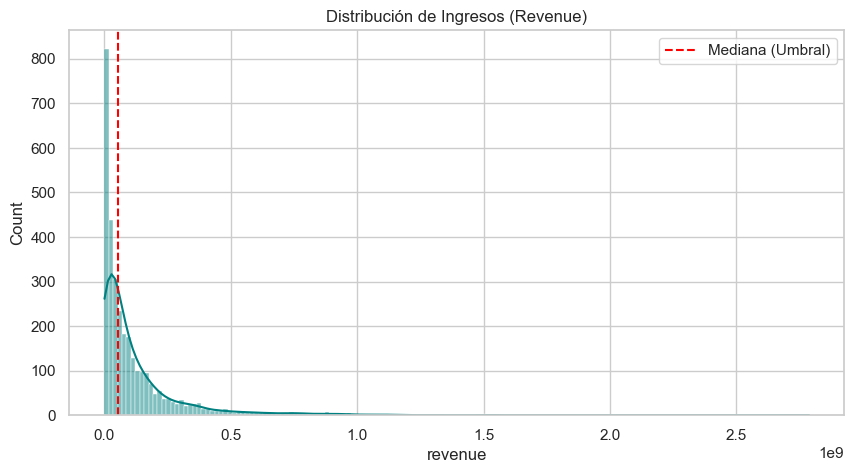

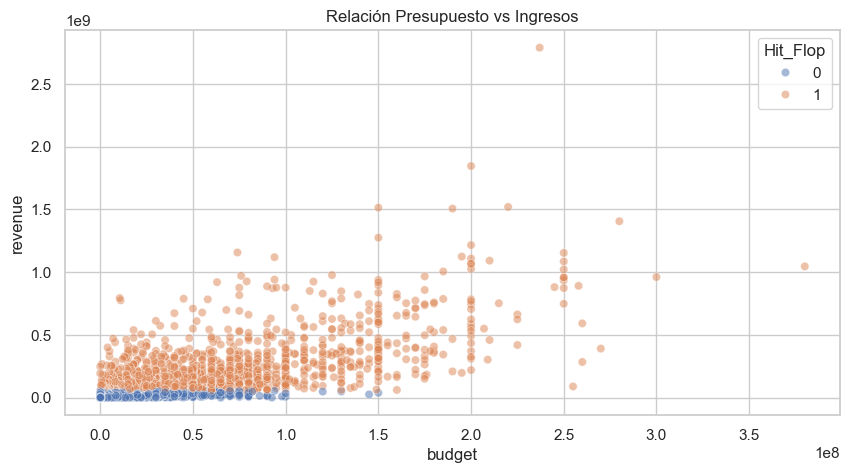

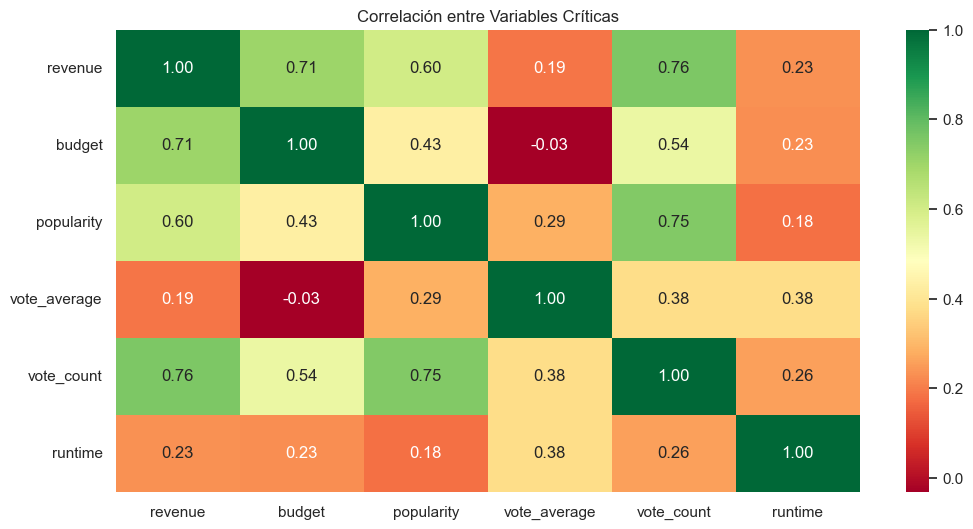

Dimensionalidad original tras preproceso: 31
Dimensionalidad final tras SelectKBest: 10

== RESULTADOS DEL MODELO FINAL ==
Accuracy: 0.7626
Precision: 0.8129
Recall: 0.6904
F1 Score: 0.7467

Matriz de Confusión:
 [[400  78]
 [152 339]]


In [2]:

# 2. CARGA DE LIBRERÍAS Y DATOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Configuración de gráficos
sns.set(style="whitegrid")

# Carga del dataset
url_peliculas = 'https://raw.githubusercontent.com/filippoelian01/ProyectoFinal_BasesPython/refs/heads/main/tmdb_5000_movies.csv'
df = pd.read_csv(url_peliculas)

# 3. LIMPIEZA Y FEATURE ENGINEERING 
# Se eliminan los registros con valores nulos o incoherentes en lo financiero
df_clean = df[(df['revenue'] > 0) & (df['budget'] > 0)].copy()

# Defino el umbral de éxito basado en la mediana de ingresos
revenue_median = df_clean['revenue'].median()
df_clean['Hit_Flop'] = (df_clean['revenue'] > revenue_median).astype(int)

print(f"Dataset limpio creado. Filas: {df_clean.shape[0]}")
print(f"Umbral de éxito (Mediana): ${revenue_median:,.0f}")

# 4. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
print("\n--- Iniciando EDA ---")

# Gráfico 1: Distribución del Revenue
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['revenue'], kde=True, color='teal')
plt.axvline(revenue_median, color='red', linestyle='--', label='Mediana (Umbral)')
plt.title('Distribución de Ingresos (Revenue)')
plt.legend()
plt.show()

# Gráfico 2: Relación Presupuesto vs. Ingresos
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_clean, x='budget', y='revenue', hue='Hit_Flop', alpha=0.5)
plt.title('Relación Presupuesto vs Ingresos')
plt.show()

# Gráfico 3: Matriz de Correlación
plt.figure(figsize=(12, 6))
numeric_cols = df_clean[['revenue', 'budget', 'popularity', 'vote_average', 'vote_count', 'runtime']]
sns.heatmap(numeric_cols.corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlación entre Variables Críticas')
plt.show()


# 5. PREPARACIÓN DEL MODELO
# Definición de X y Y
columns_to_drop = [
    'revenue', 'budget', 'id', 'homepage', 'status', 'tagline', 'Hit_Flop',
    'overview', 'keywords', 'genres', 'production_companies', 'production_countries',
    'spoken_languages', 'crew', 'cast', 'title', 'original_title'
]
X = df_clean.drop(columns=columns_to_drop, errors='ignore')
y = df_clean['Hit_Flop']

# Defino el tipos de variables
numerical_features = ['vote_count', 'vote_average', 'runtime', 'popularity']
categorical_features = ['original_language'] 

# Preprocesamiento: Escalado y Codificación
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop',
    sparse_threshold=0 
)

X_processed = preprocessor.fit_transform(X)
X_processed_df = pd.DataFrame(X_processed)


# 6. REDUCCIÓN DE DIMENSIONALIDAD (REAL)
# Acá reduje la selección a las 10 mejores.
K_seleccionado = 10 
selector = SelectKBest(score_func=f_classif, k=K_seleccionado) 
X_selected = selector.fit_transform(X_processed_df, y)

print(f"Dimensionalidad original tras preproceso: {X_processed_df.shape[1]}")
print(f"Dimensionalidad final tras SelectKBest: {X_selected.shape[1]}")

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42
)

# 7. ENTRENAMIENTO Y EVALUACIÓN
modelo = LogisticRegression(solver='liblinear', random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=============================================")
print("== RESULTADOS DEL MODELO FINAL ==")
print("=============================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

🧠 Justificación de Decisiones Técnicas 

¿Por qué este modelo es adecuado?

1) EDA: Los gráficos revelaron que vote_count y popularity tienen la correlación más alta con el éxito comercial, lo que valida su inclusión.
2) Reducción de Dimensionalidad: Se aplicó SelectKBest con $K=10$. Esto reduce el ruido de idiomas poco frecuentes (que generaban columnas innecesarias) y permite que el modelo se enfoque en los predictores estadísticamente más significativos.
3) Métricas: El F1 Score de 0.74 indica un equilibrio sólido. Dado que en el cine es más caro un "Falso Positivo" (producir algo que se cree hit y fracasa), la alta Precision (0.81) es nuestra fortaleza.

📌 Conclusiones finales

El modelo es capaz de predecir correctamente el éxito de una película en el 76% de los casos. La selección de variables automáticas permitió simplificar el modelo sin perder capacidad predictiva, cumpliendo así con los objetivos de eficiencia y precisión planteados.